In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({
    'savefig.dpi': 300, 
    "figure.dpi": 300,
    "font.family": "Arial",
    "font.size": 6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "lines.linewidth": 0.8,
})

cm = 1/2.54  # centimeters in inches

### `Xspec` X-ray Spectral Fitting

In [53]:
import numpy as np

def load_bb_cstat():
    cstatfile = "./data/nH_kTbb.txt"
    with open(cstatfile, "r") as fp:
        statlines = fp.readlines()

    statlines = [i.strip().rstrip("-") for i in statlines]

    cstatdata = []
    for iblk in range(len(statlines) // 3):
        rowdata = []
        for irow in range(3):
            rowdata.extend([float(i) for i in statlines[iblk*3 + irow].split()])
        cstatdata.append([rowdata])

    return np.concatenate(cstatdata, axis=0)[:, ::-1]

def load_pl_cstat():
    cstatfile = "./data/nH_PHOIND.txt"
    return np.loadtxt("./data/nH_PHOIND.txt")[:, ::-1]

In [54]:
bbfit = load_bb_cstat().T
plfit = load_pl_cstat().T

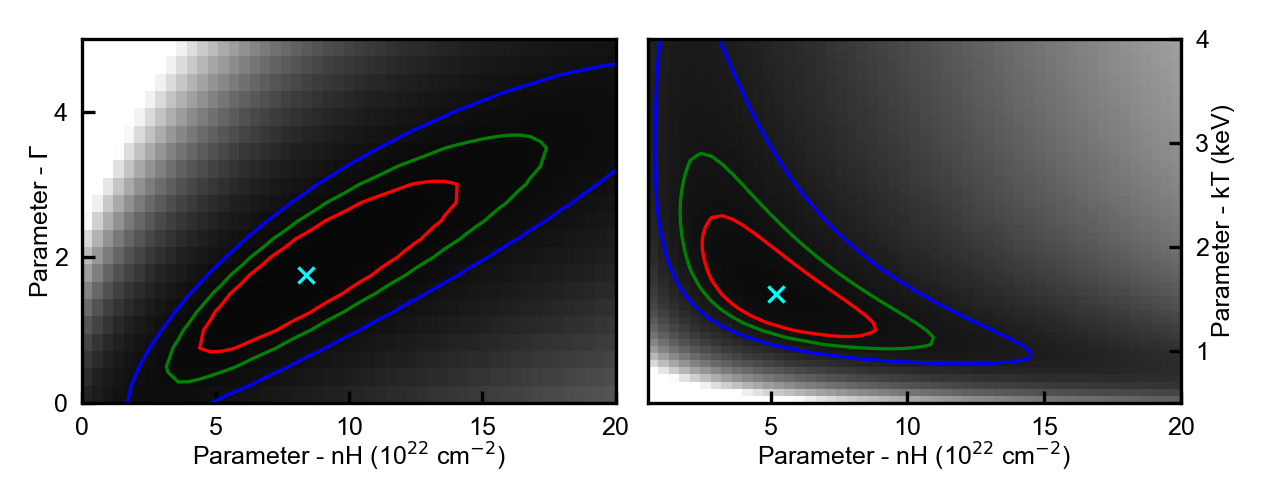

In [151]:
fig = plt.figure(figsize=(12*cm, 4*cm), dpi=300)
gridspec = GridSpec(nrows=1, ncols=2, figure=fig, wspace=0.06)

ax = fig.add_subplot(gridspec[0, 0])

im = ax.imshow(
    plfit, aspect="auto", extent=[0, 20, 0, 5], 
    cmap="grey", vmax=300, vmin=60
)

xx = np.linspace(0, 20, 51)
yy = np.linspace(5, 0, 21)
### plot the min C-stat point
xmin, ymin = np.unravel_index(np.argmin(plfit), plfit.shape)
ax.scatter(xx[ymin], yy[xmin], marker="x", color="cyan", s=15)


xx, yy = np.meshgrid(xx, yy)
ct = ax.contour(
    xx, yy, plfit,
    levels=[68.249, 70.559, 75.159],
    colors=["red", "green", "blue"]
)
ax.set_yticks([0, 2, 4])
ax.set_xticks([0, 5, 10, 15, 20])
ax.set_xlabel(r"Parameter - nH (10$^{22}$ cm$^{-2}$)", labelpad=0.12)
ax.set_ylabel(r"Parameter - $\Gamma$", labelpad=0.2)

ax = fig.add_subplot(gridspec[0, 1])

xx = np.linspace(0.5, 20, 51)
yy = np.linspace(4, 0.5, 51)
ax.imshow(
    bbfit, aspect="auto", extent=[0.5, 20, 0.5, 4],
    cmap="grey", vmax=200, vmin=60
)
### plot the min C-stat point
xmin, ymin = np.unravel_index(np.argmin(bbfit), bbfit.shape)
ax.scatter(xx[ymin], yy[xmin], marker="x", color="cyan", s=15)


xx, yy = np.meshgrid(xx, yy)
ct = ax.contour(
    xx, yy, bbfit,
    levels=[68.716, 71.026, 75.626],
    colors=["red", "green", "blue"]
)
ax.set_yticks([1, 2, 3, 4])
ax.set_xticks([5, 10, 15, 20])
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_xlabel(r"Parameter - nH (10$^{22}$ cm$^{-2}$)", labelpad=0.12)
ax.set_ylabel(r"Parameter - kT (keV)", labelpad=0.5)

fig.savefig("xray_model_cstat_contour.pdf", bbox_inches="tight", dpi=300)

### Non-detection Upper limits

In [65]:
import pandas as pd

### load fit result from Xspec
dfpl = pd.read_csv("./data/J1832-Xray_powerlow_xmmlimits.csv")
dfbb = pd.read_csv("./data/J1832-Xray_blackbody_xmmlimits.csv")

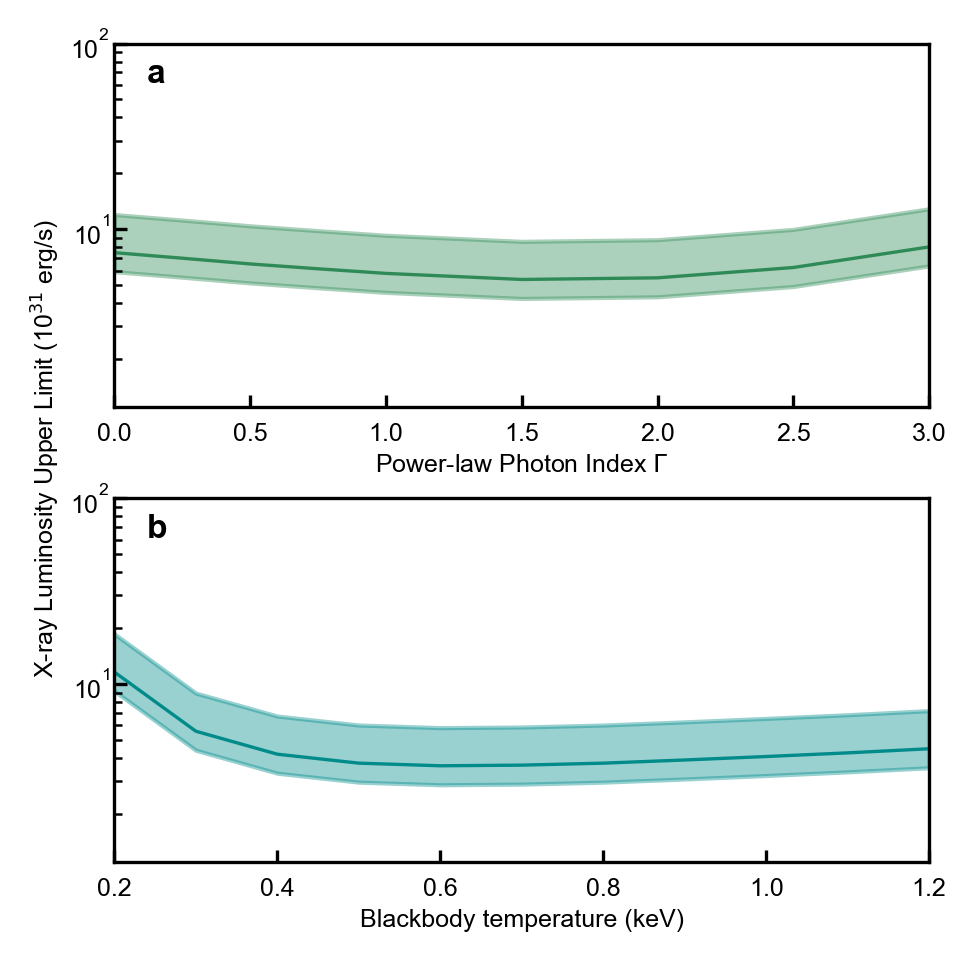

In [67]:
fig = plt.figure(figsize=(8.9*cm, 9*cm), dpi=300)
gridspec = GridSpec(nrows=2, ncols=1, figure=fig, hspace=0.25)

### upper limit for photon index
ax = fig.add_subplot(gridspec[0, 0])

ax.plot(dfpl["PL index"], dfpl["Lum_X_e33"]*1e2, color="seagreen", zorder=2)
ax.fill_between(
    dfpl["PL index"],
    dfpl["Lum_X_e33"] * 1e2 * (4 / 4.5) ** 2,
    dfpl["Lum_X_e33"] * 1e2 * (5.7 / 4.5) ** 2,
    color="seagreen", alpha=0.4
)

ax.set_yscale("log")
ax.set_xlim(0, 3)
ax.set_ylim(1.1, 100)
ax.tick_params(axis="y", which="both", pad=1.2)
ax.set_xlabel(r"Power-law Photon Index $\Gamma$", labelpad=2.0)
ax.text(
    x=0.04, y=0.96, s="a", weight="bold", fontsize=8,
    color="k", va="top", ha="left", transform=ax.transAxes,
)

### upper limit for blackbody temperature
ax = fig.add_subplot(gridspec[1, 0])

ax.plot(dfbb["kT (keV)"], dfbb["Lum_X_e33"]*1e2, color="darkcyan", zorder=2)
ax.fill_between(
    dfbb["kT (keV)"],
    dfbb["Lum_X_e33"] * 1e2 * (4 / 4.5) ** 2,
    dfbb["Lum_X_e33"] * 1e2 * (5.7 / 4.5) ** 2,
    color="darkcyan", alpha=0.4
)

ax.set_yscale("log")
ax.set_xlim(0.2, 1.2)
ax.set_ylim(1.1, 100)
ax.tick_params(axis="y", which="both", pad=1.2)
# ax.yaxis.tick_right()
# ax.yaxis.set_label_position("right")
ax.set_xlabel(r"Blackbody temperature (keV)", labelpad=2.0)
ax.text(
    x=0.04, y=0.96, s="b", weight="bold", fontsize=8,
    color="k", va="top", ha="left", transform=ax.transAxes,
)

plt.text(
    x=0.06, y=0.5, s=r"X-ray Luminosity Upper Limit (10$^{31}$ erg/s)",
    va="center", ha="center", transform=fig.transFigure, rotation=90
)

# fig.savefig("xray_nondetection_upper_limit.pdf", bbox_inches="tight", dpi=300)
fig.savefig("xray_nondetection_upper_limit.jpg", bbox_inches="tight", dpi=300)

### Magnetar Quiescent luminosity constraints

In [68]:
import pandas as pd

### the following table will be presented in further manuscript in preparation
df_sources_data = pd.read_csv('./.data/PPdotB_LumkTage_allclasses_11112024.csv')

In [69]:
def _add_age_lum_limits(ax, selectdf, xcol, ycol):
    for _, row in selectdf.iterrows():
        # Plot upperlimits
        if row['lum_ul']==True:
            ax.annotate(
                "", xy=(row[xcol], row[ycol]/3), 
                xytext=(row[xcol], row[ycol]*1.05),
                arrowprops=dict(arrowstyle="->", lw=0.5, color='k'), alpha=1.0
            )

        # Plot Pdot upperlimits
        if row['pdot_ul']==True:
            ax.annotate(
                "", xy=(row[xcol]*2, row[ycol]), 
                xytext=(row[xcol]/1.05, row[ycol]),
                arrowprops=dict(arrowstyle="->", lw=0.5, color='k'), alpha=1.0
            )

        # highlight radio magnetars
        if row['radio']==True:
            ax.scatter(
                row[xcol], row[ycol], 
                s=35, facecolors='none', edgecolors='black', linewidths=0.3, alpha=0.9
            )
    return ax

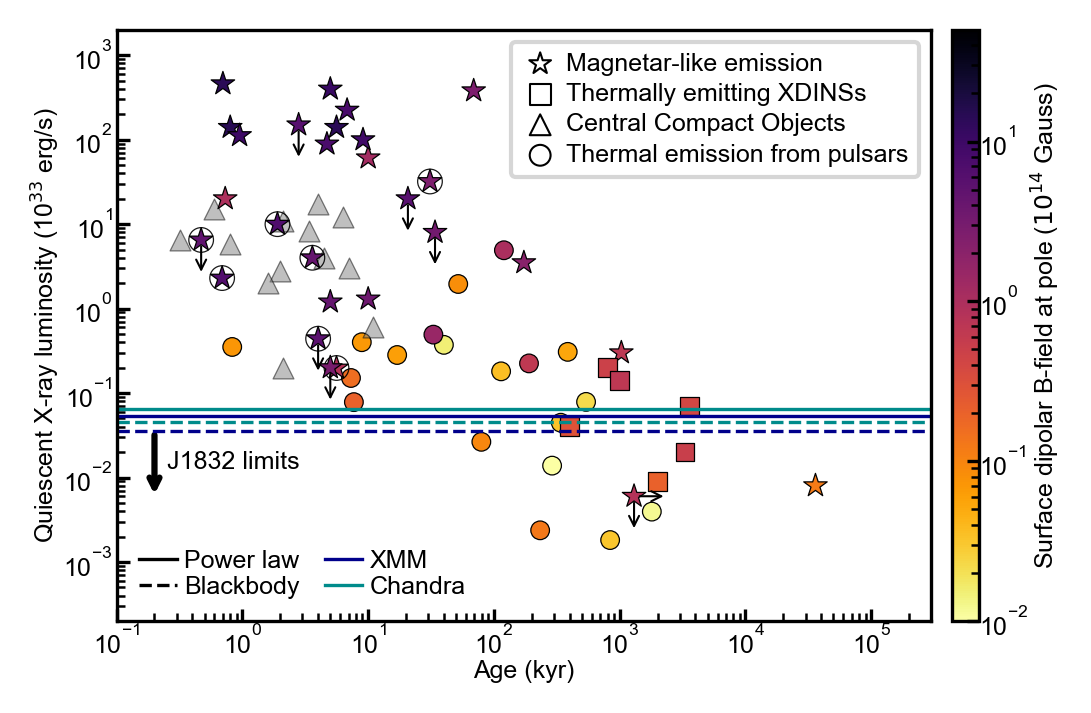

In [71]:
fig = plt.figure(figsize=(8.9*cm, 6.5*cm), dpi=300)
ax = fig.add_subplot(1, 1, 1)

cmap = "inferno_r"
norm = mpl.colors.LogNorm(1e-2, 5e1)

### plot data for magnetar
# with real age estimation i.e., SNR association
xcol = 'tau_real(kyr)'; ycol = 'luminosity_bol_qui(e33erg/s)'
selectbool = (df_sources_data['class']=='Magnetar' ) & (~np.isnan(df_sources_data['tau_real(kyr)']))
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=1.0, marker="*", edgecolors="black", s=35,
    linewidths=0.3, 
)
# plot limits
ax = _add_age_lum_limits(ax, selectdf, xcol=xcol, ycol=ycol)

# without real age estimation
xcol = 'tau_c(kyr)'; ycol = 'luminosity_bol_qui(e33erg/s)'
selectbool = (df_sources_data['class']=='Magnetar' ) & (np.isnan(df_sources_data['tau_real(kyr)']))
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=1.0, marker="*", edgecolors="black", s=35,
    linewidths=0.3, 
)
# plot limits
ax = _add_age_lum_limits(ax, selectdf, xcol=xcol, ycol=ycol)

### plot data for XDINS
# with tau_real
xcol = 'tau_real(kyr)'; ycol = 'luminosity_bol_qui(e33erg/s)'
selectbool = (df_sources_data['class']=='XDINS' ) & (~np.isnan(df_sources_data['tau_real(kyr)']))
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=1.0, marker="s", edgecolors="black", s=20,
    linewidths=0.3, 
)

# with tau_C
xcol = 'tau_c(kyr)'; ycol = 'luminosity_bol_qui(e33erg/s)'
selectbool = (df_sources_data['class']=='XDINS' ) & (np.isnan(df_sources_data['tau_real(kyr)']))
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=1.0, marker="s", edgecolors="black", s=20,
    linewidths=0.3, 
)

### CCO
xcol = 'tau_real(kyr)'; ycol = 'luminosity_bol_qui(e33erg/s)'
selectbool = df_sources_data['class']=='CCO'
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = "grey", alpha=0.5, marker="^", edgecolors="black", s=25,
    linewidths=0.3, zorder=-1 
)

### pulsars
# with tau_real
xcol = 'tau_real(kyr)'; ycol = 'luminosity_bol_qui(e33erg/s)'
selectbool = (df_sources_data['class']=='RPP' ) & (~np.isnan(df_sources_data['tau_real(kyr)']))
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=1.0, marker="o", edgecolors="black", s=20,
    linewidths=0.3, zorder=-3
)

# with tau_c
xcol = 'tau_c(kyr)'; ycol = 'luminosity_bol_qui(e33erg/s)'
selectbool = (df_sources_data['class']=='RPP' ) & (np.isnan(df_sources_data['tau_real(kyr)']))
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=1.0, marker="o", edgecolors="black", s=20,
    linewidths=0.3, zorder=-3
)

### add limits from Chandra and XMM observation
# XMM limit
ax.axhline(y=3.6e-2, color="darkblue", lw=0.8, ls="--") # BB
ax.axhline(y=5.3e-2, color="darkblue", lw=0.8) # PL
# Chandra limit
ax.axhline(y=4.6e-2, color="darkcyan", lw=0.8, ls="--") # BB
ax.axhline(y=6.5e-2, color="darkcyan", lw=0.8) # PL
# add arrow...
ax.annotate(
    "", xy=(2e-1, 5e-3), 
    xytext=(2e-1, 4e-2),
    arrowprops=dict(arrowstyle="->", lw=1.5, color='k'), 
    zorder=-1, alpha=1.0
)
ax.text(x=2.5e-1, y=1.5e-2, s="J1832 limits", va="center", ha="left")

### add colorbar
cbar_ax = fig.add_axes([0.92, 0.11, 0.025, 0.77])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar_ax.tick_params(axis="y", which="both", pad=0.2)
cbar.set_label('Surface dipolar B-field at pole ($10^{14}$ Gauss)', labelpad=0.2)

### add captions
# for the limits...
l3, = ax.plot([], [], color="darkblue", lw=0.8, label="XMM")
l4, = ax.plot([], [], color="darkcyan", lw=0.8, label="Chandra")
l1, = ax.plot([], [], color="k", lw=0.8, label="Power law")
l2, = ax.plot([], [], color="k", lw=0.8, ls = "--", label="Blackbody")


leg1 = ax.legend(
    handles=[l1, l2, l3, l4], loc="lower left", ncol=2, frameon=False,
    labelspacing=0.1, handlelength=1.5, columnspacing=1.0, handletextpad=0.3
)
ax.add_artist(leg1)

# for markers
s1 = ax.scatter([], [], s=30, marker="*", facecolor="none", edgecolor="k", linewidths=0.5, label="Magnetar-like emission")
s2 = ax.scatter([], [], s=25, marker="s", facecolor="none", edgecolor="k", linewidths=0.5, label="Thermally emitting XDINSs")
s3 = ax.scatter([], [], s=25, marker="^", facecolor="none", edgecolor="k", linewidths=0.5, label="Central Compact Objects")
s4 = ax.scatter([], [], s=25, marker="o", facecolor="none", edgecolor="k", linewidths=0.5, label="Thermal emission from pulsars")

leg2 = ax.legend(
    handles=[s1, s2, s3, s4], loc="upper right", frameon=True,
    labelspacing=0.3, handlelength=1.5, handletextpad=0.3
)


ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(1e-1, 3e5)
ax.set_ylim(2e-4, 2e3)
ax.tick_params(axis="both", which="both", pad=1)
ax.set_xlabel(r"Age (kyr)", labelpad=0.2)
ax.set_ylabel(r"Quiescent X-ray luminosity (10$^{33}$ erg/s)", labelpad=0.2)

# fig.savefig("quiescent_xray_age.pdf", bbox_inches="tight", dpi=300)
fig.savefig("quiescent_xray_age.jpg", bbox_inches="tight", dpi=300)

### Magneto-thermal evolutionary models for NS

In [72]:
import pandas as pd

from astropy import constants
from astropy import units

df_atnf_data = pd.read_csv('./data/ATNF_catalog_Pgr0.01_25062021.csv', delimiter=';')
### the following table will be presented in further manuscript in preparation
df_sources_data = pd.read_csv('./.data/PPdotB_LumkTage_allclasses_11112024.csv')

### the following files will be presented in further manuscript in preparation
coolcurve_files = [
    '.data/csv_Gud_NoNusyn/cool_curve_CC_Bdip1e12_Btor1e13_no_nuSyn_Gudmundsson.csv',
    '.data/csv_Gud_NoNusyn/cool_curve_CC_Bdip1e14_Btor1e15_no_nuSyn_Gudmundsson.csv',
    '.data/csv_Gud_NoNusyn/cool_curve_CC_Bdip1e15_Btor5e15_no_nuSyn_Gudmundsson.csv',
    '.data/csv_Gud_NoNusyn/cool_curve_CC_Bdip3e14_Btor1e15_no_nuSyn_Gudmundsson.csv',
    '.data/csv_Gud_NoNusyn/cool_curve_CC_Bdip1e13_Btor1e14_no_nuSyn_Gudmundsson.csv',
    '.data/csv_Gud_NoNuSyn/cool_curve_Bpol_3e15_Etor_40_Btor_3e16_BtorAverage_4.4e14.csv',
]

In [73]:
def _add_ppdot_limits(ax, selectdf, xcol, ycol, magnetar=True):
    for _, row in selectdf.iterrows():
        # highlight radio magnetars
        if row['radio']==True and magnetar:
            ax.scatter(
                row[xcol], row[ycol], 
                s=25, facecolors='none', edgecolors='black', linewidths=0.3, alpha=0.9
            )

        # Plot Pdot upperlimits
        if row['pdot_ul']==True:
            ax.annotate(
                "", xy=(row[xcol], row[ycol]/10), 
                xytext=(row[xcol], row[ycol]*1.1),
                arrowprops=dict(arrowstyle="->", lw=0.5, color='k'), alpha=1.0
            )

    return ax

def _add_eedot_limits(ax, selectdf, xcol, ycol):
    for _, row in selectdf.iterrows():
        # highlight radio magnetars
        if row['radio']==True:
            ax.scatter(
                row[xcol], row[ycol], 
                s=25, facecolors='none', edgecolors='black', linewidths=0.3, alpha=0.9
            )

        # Plot E upperlimits
        if row['lum_ul']==True:
            ax.annotate(
                "", xy=(row[xcol], row[ycol]/2.5), 
                xytext=(row[xcol], row[ycol]*1.05),
                arrowprops=dict(arrowstyle="->", lw=0.5, color='k'), alpha=1.0
            )
        
        # Plot Edot upper limit
        if row['pdot_ul']==True:
            ax.annotate(
                "", xy=(row[xcol]/3, row[ycol]), 
                xytext=(row[xcol]*1.05, row[ycol]),
                arrowprops=dict(arrowstyle="->", lw=0.5, color='k'), alpha=1.0
            )

    return ax

### add text plotting
def _add_lpt_ppdot_text(ax, **kwargs):
    textdf = pd.read_csv("./ppdot_source_text.csv")
    for _, textrow in textdf.iterrows():
        ax.text(**textrow.to_dict(), **kwargs)
    return ax

### add evolutional curves
def _add_ppdot_ecurves(ax, norm, cmap, linewidth=0.5):
    par_x= 'P_vacObs[s]'; par_y = 'Pdot_vacObs[s/s]'; par_c = 'B[G]'
    for cfile in coolcurve_files:
        data = pd.read_csv(cfile)
        x = data[par_x] 
        y = data[par_y]/1e-11
        c = data[par_c]/1e14
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = mpl.collections.LineCollection(segments, cmap=cmap, norm=norm)
        ### set values for color mapping
        lc.set_array(c)
        lc.set_linewidth(linewidth)
        ax.add_collection(lc)
    return ax

def _add_cc_ppdot_text(ax, **kwargs):
    textdf = pd.read_csv("./ppdot_cc_text.csv", comment="#")
    for _, textrow in textdf.iterrows():
        ax.text(**textrow.to_dict(), **kwargs)
    return ax

def _add_eedot_ecurves(ax, norm, cmap, linewidth=0.5):
    par_x = 'Edot'; par_y = 'L[erg/s]'; par_c = 'B[G]'
    for cfile in coolcurve_files:
        data = pd.read_csv(cfile)
        data["Edot"] = (4*1e45*np.pi**2*data['Pdot_vacObs[s/s]']) / (data['P_vacObs[s]'] **3)
        x = data[par_x]/1e33
        y = data[par_y]/1e33
        c = data[par_c]/1e14
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = mpl.collections.LineCollection(segments, cmap=cmap, norm=norm)
        ### set values for color mapping
        lc.set_array(c)
        lc.set_linewidth(linewidth)
        ax.add_collection(lc)
    return ax

def _add_cc_eedot_text(ax, **kwargs):
    textdf = pd.read_csv("./eedot_cc_text.csv", comment="#")
    for _, textrow in textdf.iterrows():
        ax.text(**textrow.to_dict(), **kwargs)
    return ax

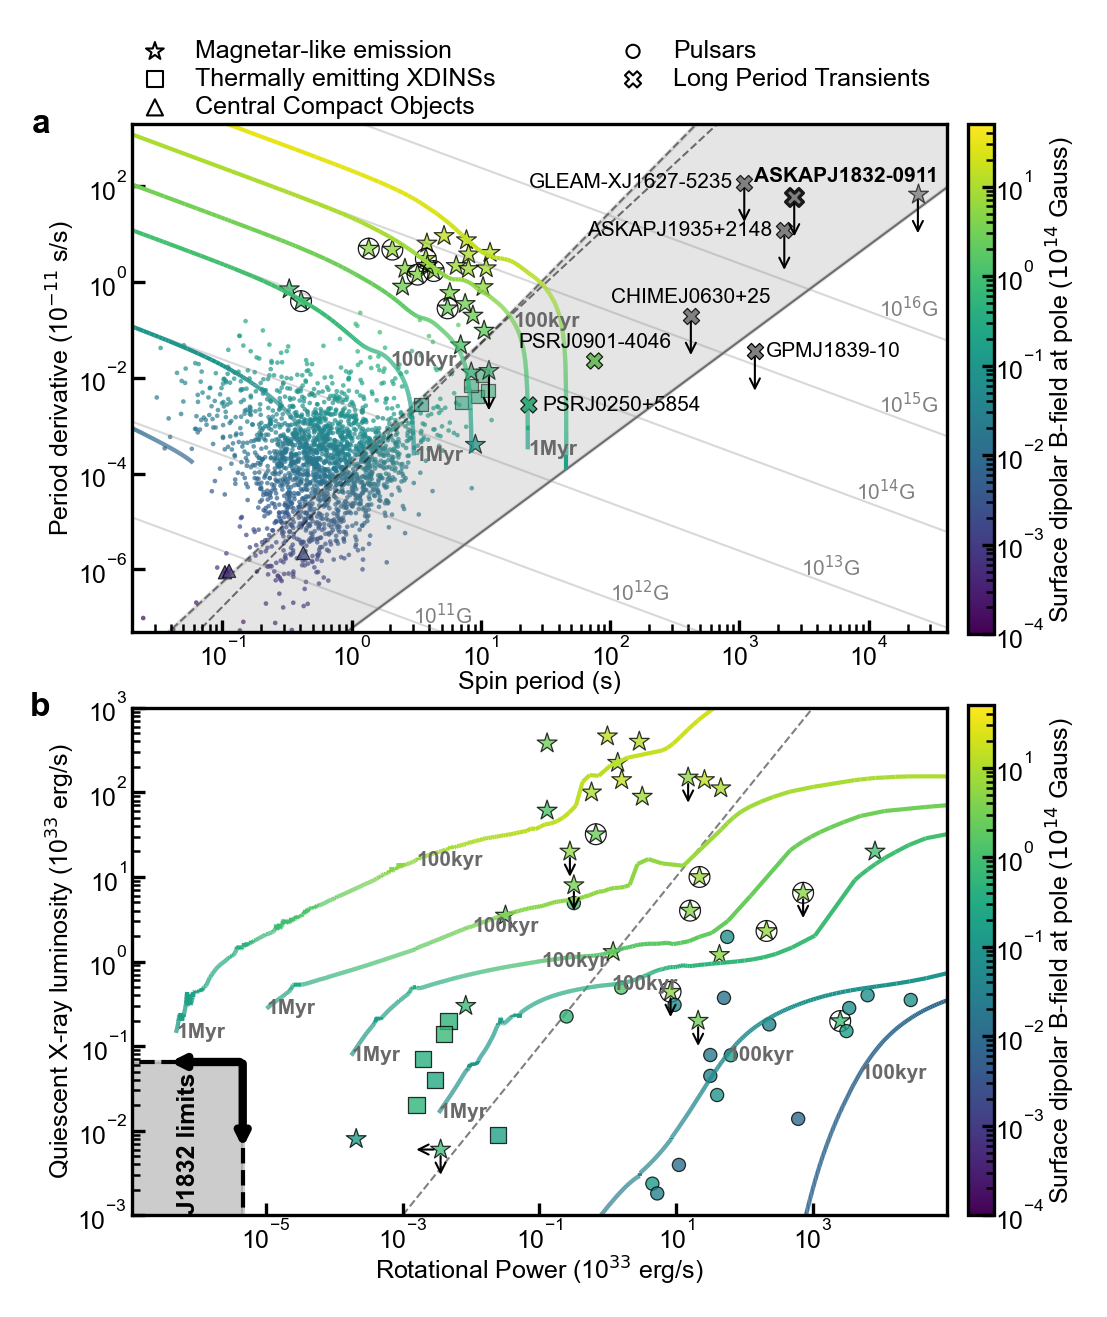

In [75]:
fig = plt.figure(figsize=(8.9*cm, 12*cm), dpi=300)
gridspec = GridSpec(nrows=2, ncols=1, figure=fig, hspace=0.15)

### P-Pdot and also death valley
ax = fig.add_subplot(gridspec[0, 0])

cmap = "viridis"
norm = mpl.colors.LogNorm(1e-4, 5e1)
xcol = 'period(s)'; ycol = 'pdot(1e-11s/s)'

### plot data for magnetar
selectbool = df_sources_data['class']=='Magnetar'
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=0.8, marker="*", edgecolors="black", s=25,
    linewidths=0.3, 
)
# plot limits
ax = _add_ppdot_limits(ax, selectdf, xcol=xcol, ycol=ycol)

### XDINSs
selectbool = df_sources_data['class']=='XDINS'
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=0.6, marker="s", edgecolors="black", s=10,
    linewidths=0.3, zorder=-1
)

### COOs
selectbool = (df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['Edot(e33erg/s)']))
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=0.8, marker="^", edgecolors="black", s=10,
    linewidths=0.3
)

### pulsars
ax.scatter(
    x=df_atnf_data['P0'], y=df_atnf_data['P1']/1.e-11, 
    c=df_atnf_data['BSURF']/0.5e14, cmap=cmap, norm=norm,
    marker='.', zorder=-3, edgecolors='grey',
    s=5, alpha=0.7, linewidth=0,
)


################## long period sources ################
# PSR J0250+5854 & PSR J0901-4046
selectbool = (df_sources_data['source']=='PSRJ0250+5854') | (df_sources_data['source']=='PSRJ0901-4046')
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=1.0, marker="X", edgecolors="black", s=15,
    linewidths=0.3
)

# PCW103
selectbool = df_sources_data['source']=='1E161348-5055'
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = "grey", cmap=cmap, norm=norm,
    alpha=0.8, marker="*", edgecolors="black", s=25,
    linewidths=0.3
)
ax = _add_ppdot_limits(ax, selectdf, xcol=xcol, ycol=ycol)

# literature LPTs
selectbool = df_sources_data['class']=='LPT'
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = "grey", cmap=cmap, norm=norm,
    alpha=1.0, marker="X", edgecolors="black", s=15,
    linewidths=0.3
)
ax = _add_ppdot_limits(ax, selectdf, xcol=xcol, ycol=ycol, magnetar=False)

# highlight ASKAP J1832
selectbool = df_sources_data['source']=='ASKAPJ1832-0911'
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = "grey", cmap=cmap, norm=norm,
    alpha=1.0, marker="X", edgecolors="black", s=18,
    linewidths=0.8
)


### add text for LPTs
ax = _add_lpt_ppdot_text(ax, fontsize=5)
ax.text(x=1300, y=100, s="ASKAPJ1832-0911", va="bottom", ha="left", fontsize=5, weight="bold")

############# magnetic field lines ##############
x = np.logspace(-3, 6, 3000)
def yplace(Gpow, x):
    return ((10**Gpow)**2)/(x * 1.e-11*(6.4*10**19)**2) 
for G in range (11, 17):
    ax.plot(x, yplace(G, x), 'grey', alpha=0.3, lw=0.5, ls="-")
### add labels
ax.text(1.2e4, yplace(16, 1.2e4)*0.9, s=r"10$^{16}$G", color="grey", fontsize=5)
ax.text(1.2e4, yplace(15, 1.2e4)*0.9, s=r"10$^{15}$G", color="grey", fontsize=5)
ax.text(8e3, yplace(14, 8e3)*0.9, s=r"10$^{14}$G", color="grey", fontsize=5)
ax.text(3e3, yplace(13, 3e3)*0.9, s=r"10$^{13}$G", color="grey", fontsize=5)
ax.text(1e2, yplace(12, 1e2)*0.9, s=r"10$^{12}$G", color="grey", fontsize=5)
ax.text(3e0, yplace(11, 3e0)*0.9, s=r"10$^{11}$G", color="grey", fontsize=5)


############# evolution curves ##############
ax = _add_ppdot_ecurves(ax, norm=norm, cmap=cmap, linewidth=1)
ax = _add_cc_ppdot_text(ax, fontsize=5, weight="bold", color="dimgrey", ha='left', va='center', )

############# death lines #############
light_c_cgs = constants.c.cgs.value
R_NS6 = 1.2
R_NS = 1.2*1.e6
Msolar = 2*1.e33
M_NS = 1.4*Msolar
K = 4 * (3 * light_c_cgs**3) * 2 / (5 * 8 * np.pi**2)

xx = np.logspace(-3, 6, 3000)
# pure dipole - Chen et al.
chen1_ppdot_pd = 1/K * ((2.2*1.e12 * (R_NS6)**(-19/8) * x**(15/8))**2) * (R_NS)**4 / M_NS  / x
ax.plot(xx,chen1_ppdot_pd/1.e-11, linestyle='dashed', color='black', alpha=0.6, lw=0.5, zorder=-1)
# pure dipole - Zhang et al.
zhangIII_ppdot = 1/K * ((9.2*1.e25 * (R_NS)**(-9/4) * x**(7/4))**2) * (R_NS)**4 / M_NS  / x
ax.plot(xx,zhangIII_ppdot/1.e-11, linestyle='dashed', color='black', alpha=0.6, lw=0.5, zorder=-1)
# multipolar with beta=10
beta = 10
chen4_ppdot_tw_multi = 1/K * ((9.2*1.e10 * beta**(-1/4) * (R_NS6)**(-2) * x**(3/2))**2) * (R_NS)**4 / M_NS  / x
ax.plot(xx,chen4_ppdot_tw_multi/1.e-11, linestyle='solid', color='black', alpha=0.6, lw=0.5, zorder=-1)
### fill death valley
ax.fill_between(x, chen4_ppdot_tw_multi/1.e-11, np.maximum(chen1_ppdot_pd/1.e-11, zhangIII_ppdot/1.e-11), color='grey', alpha=0.2)

#### add subfigure label
# ax.text(
#     x=0.02, y=0.98, s="(a)", weight="bold", 
#     color="k", va="top", ha="left", transform=ax.transAxes,
# )
ax.text(
    x=-0.1, y=1.0, s="a", weight="bold", fontsize=8,
    color="k", va="center", ha="right", transform=ax.transAxes,
)

############ add colorbar #############
cbar_ax = fig.add_axes([0.92, 0.52, 0.025, 0.36])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar_ax.tick_params(axis="y", which="both", pad=0.2)
cbar.set_label('Surface dipolar B-field at pole ($10^{14}$ Gauss)', labelpad=0.2)

########### labels ###########
s1 = ax.scatter([], [], s=20, marker="*", facecolor="none", edgecolor="k", linewidths=0.5, label="Magnetar-like emission")
s2 = ax.scatter([], [], s=15, marker="s", facecolor="none", edgecolor="k", linewidths=0.5, label="Thermally emitting XDINSs")
s3 = ax.scatter([], [], s=15, marker="^", facecolor="none", edgecolor="k", linewidths=0.5, label="Central Compact Objects")
s4 = ax.scatter([], [], s=10, marker="o", facecolor="none", edgecolor="k", linewidths=0.5, label="Pulsars")
s5 = ax.scatter([], [], s=15, marker="X", facecolor="none", edgecolor="k", linewidths=0.5, label="Long Period Transients")

leg2 = ax.legend(
    handles=[s1, s2, s3, s4, s5], frameon=False, ncol=2,
    loc="upper left", bbox_to_anchor=(-0.03, 1.18, 1, 0.03),
    labelspacing=0.2, handlelength=2.0, handletextpad=0.6, 
    columnspacing=4.5
)

### general figure setting
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(2e-2, 4e4)
ax.set_ylim(5e-8, 2e3)
ax.tick_params(axis="x", which="both", pad=1.2)
ax.tick_params(axis="y", which="both", pad=1.2)
ax.set_xlabel(r"Spin period (s)", labelpad=0.1)
ax.set_ylabel(r"Period derivative (10$^{-11}$ s/s)", labelpad=0.1)


##################### bottom panel ######################
### Spin-down luminosity and Quiescent luminosity
ax = fig.add_subplot(gridspec[1, 0])

cmap = "viridis"
norm = mpl.colors.LogNorm(1e-4, 5e1)
xcol = 'Edot(e33erg/s)'; ycol = 'luminosity_bol_qui(e33erg/s)'

### plot data for magnetar
selectbool = (df_sources_data['class']=='Magnetar') & (~np.isnan(df_sources_data['Edot(e33erg/s)']))
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=0.8, marker="*", edgecolors="black", s=25,
    linewidths=0.3, 
)
# plot limits
ax = _add_eedot_limits(ax, selectdf, xcol=xcol, ycol=ycol)

# XDINSs
selectbool = (df_sources_data['class']=='XDINS') & (~np.isnan(df_sources_data['Edot(e33erg/s)']))
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=0.8, marker="s", edgecolors="black", s=15,
    linewidths=0.3, 
)

# pulsars
selectbool = (df_sources_data['class']=='RPP') & (~np.isnan(df_sources_data['Edot(e33erg/s)']))
selectdf = df_sources_data[selectbool]
ax.scatter(
    selectdf[xcol], selectdf[ycol],
    c = selectdf["Bp(e14G)"], cmap=cmap, norm=norm,
    alpha=0.8, marker="o", edgecolors="black", s=10,
    linewidths=0.3, 
)

##### add cooling curves
ax = _add_eedot_ecurves(ax, norm=norm, cmap=cmap, linewidth=1)
ax = _add_cc_eedot_text(ax, fontsize=5, weight="bold", color="dimgrey", ha='left', va='center', )

### add J1832 limits, Xray limits 6.5e31; Edot limits 4.6e27
srclimits = mpl.patches.Rectangle(
    xy=(4.6e-6, 6.5e-2), width=-4.6e-6, height=-6.5e-2,
    color="grey", alpha=0.4, 
)
ax.add_artist(srclimits)
srclimits = mpl.patches.Rectangle(
    xy=(4.6e-6, 6.5e-2), width=-4.6e-6, height=-6.5e-2,
    facecolor="none", alpha=1.0, ls="--", edgecolor="k"
)
ax.add_artist(srclimits)
### add arrows
ax.annotate(
    "", xy=(4.6e-6, 5e-3), xytext=(4.6e-6, 6.5e-2*1.2),
    arrowprops=dict(arrowstyle="->", lw=2, color='k'), 
    zorder=99, alpha=1.0
)
ax.annotate(
    "", xy=(3e-7, 6.5e-2), xytext=(4.6e-6*1.2, 6.5e-2),
    arrowprops=dict(arrowstyle="->", lw=2, color='k'), 
    zorder=99, alpha=1.0
)
### add text
ax.text(5e-7, 1.2e-3, s="J1832 limits", rotation=90, ha="left", weight="bold")

### add Edot = EX line
xx = np.linspace(1e-6,1e4,1000)
ax.plot(xx, xx, ls="--", lw=0.5, color="grey", zorder=-1)
# ax.legend(loc="upper left", frameon=False)

### add subfigure label
# ax.text(
#     x=0.02, y=0.98, s="(b)", weight="bold", 
#     color="k", va="top", ha="left", transform=ax.transAxes,
# )
ax.text(
    x=-0.1, y=1.0, s="b", weight="bold", fontsize=8,
    color="k", va="center", ha="right", transform=ax.transAxes,
)


############ add colorbar #############
cbar_ax = fig.add_axes([0.92, 0.11, 0.025, 0.36])
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)
cbar_ax.tick_params(axis="y", which="both", pad=0.2)
cbar.set_label('Surface dipolar B-field at pole ($10^{14}$ Gauss)', labelpad=0.2)

ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(1.1e-7, 9e4)
ax.set_ylim(1e-3, 1e3)
ax.tick_params(axis="x", which="both", pad=1.2)
ax.tick_params(axis="y", which="both", pad=1.2)
ax.set_xlabel(r"Rotational Power (10$^{33}$ erg/s)", labelpad=0.1)
ax.set_ylabel(r"Quiescent X-ray luminosity (10$^{33}$ erg/s)", labelpad=0.1)

# fig.savefig("magneto-thermal_evolution.pdf", bbox_inches="tight", dpi=300)
fig.savefig("magneto-thermal_evolution.jpg", bbox_inches="tight", dpi=300)